# Part01 - Data Wrangling

## Introduction:
In this notebook, we are going to load the data, clean the data, and do data preprocessing or that process can be called as Data Wrangling. Data Wrangling is needed to make data more appropriate and valuable for further analysis. Beside that, we will need Exploratory Data Analysis (EDA) to draw insight that we will use in data preprocessing step. <p>

<em>Disclaimer: This project is not non-profit and freely accessible. This project only for learning purpose only</em>

## Problem Statement:
Before we go any further, the first thing that I will do is restate our problem statement to clarify the problems we face. This is an important thing when we want to make some Data Science Project because sometime we forget about what we want to aim in project so the results we obtain are not what we want. <p>

<ul>
    <li><strong>Statement 1: What aspects/feature are most important to prevent customer churn?</strong></li>
        <ul>
            <li>Value: The most important aspects/feature </li>
            <li>Goal: Prevent customer churn </li>
        </ul>
    <li><strong>Statement 2: How to predict customer churn before it happens in order to minimize losses due to customer churn? </strong></li>
        <ul>
            <li>Value: Chance of customer churn</li>
            <li>Goal: Minimize losses due to customer churn</li>
        </ul>
</ul> <p>

Even though at this time there are only 2 problem statements, in the future it is possible that problem statements will increase because of my curiosity. However, main problem statement are those 2 problem statements.

## Load Library:

In [23]:
# Data
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

## Load Dataset:
For our dataset, can be downloaded for free in <a href = "https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction">Kaggle</a>. This dataset was created by <a href = "https://www.kaggle.com/ankitverma2010">Ankit Verma</a> in January 2021. Sadly, this dataset not real world dataset, but Ankit Verma had created this dataset resembles a real world dataset for learning purpose. Thanks to him. <p>
Let's load our dataset. This dataset is in excel format. There is 2 sheet that we must pay attention. "Data Dict" sheet is talking about data description and "E comm" sheet is the data we will use. To read our dataset we need pandas library

In [24]:
dfUnc = pd.read_excel("E Commerce Dataset.xlsx", sheet_name="E Comm")
dfUnc.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [25]:
dfUnc.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


## Info Dataset:
It's very important to understand our dataset, the shape, what each feature represent, and the datatype for each feature. So let's see our dataset information before doing anything further.

In [26]:
dfUnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## Explanation of Dataset:
From dataset information, we know that our data has 5630 observations and 20 features. I think our observations not too big so we need be carefull everytime we want drop some observation.<p>
Here is an explanation of our 20 dataset features:
- <strong>CustomerID</strong>: Unique customer ID
- <strong>Churn</strong>: Churn flag
    - 1: churn customer
    - 0: non churn customer
- <strong>Tenure</strong>: Tenure of customer in organization
- <strong>PreferredLoginDevice</strong>: Preferred login device of customer
- <strong>CityTier</strong>: City tier of customer
    - 1: Urban area
    - 2: Rural area
    - 3: Underdeveloped area
- <strong>WarehouseToHomeDistance</strong>: Distance in between warehouse of customer
- <strong>PreferredPaymentMode</strong>: Preferred payment method of customer
- <strong>Gender</strong>: Gender of customer
- <strong>HourSpendonApp</strong>: Number of hours spend on mobile application or website
- <strong>PreferedOrderCat</strong>: Preferred order category of customer in last month
- <strong>SatisfactionScore</strong>: Satisfactory score of customer on serivce
- <strong>MaritalStatus</strong>: Marital status of customer
- <strong>NumberOfAddress</strong>: Total number of added on particular customer
- <strong>Complain</strong>: Any complaint has been raised in last month
    - 1: made a complaint last month
    - 0: never made a complaint last month
- <strong>OrderAmountHikeFromLastYear</strong>: Percentage increase in order from last year
- <strong>CouponUsed</strong>: Total number of coupon has been used in last month
- <strong>OrderCount</strong>: Total number of orders has been places in last month
- <strong>DaySinceLastOrder</strong>: Day since last order by customer
- <strong>CashbackAmount</strong>: Average cashback in last month <p>

Each observation represent customer data. 

<em>Note: Because this data was created in January 2021, which I don't know the exact date, I will assume we are working on this project 1 day after this dataset exists</em>

## Check Missing Value:
If we look the amount data of each feature is different and not equal 5630. That means we have a missing value problem. To solve that problem, we can drop the observation that have a missing value. However as I said before, our data is not too big so we have to be carefull in drop the data so the first thing I will do is check the number of observations that have a missing value. If it's too big then we need to use another way.

In [27]:
dfUnc.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Seems a little difficult to see, let's visualize to make it easier for us

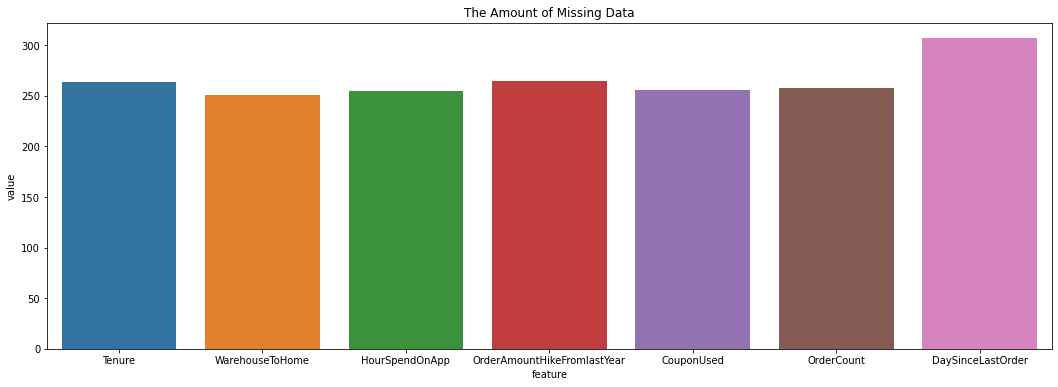

In [28]:
# Missing data
missingData = pd.DataFrame(dfUnc.isnull().sum()[dfUnc.isnull().sum() != 0]).reset_index().rename(columns={'index':'feature', 0:'value'})

# Visualization
plt.figure(figsize=(18,6))
sns.barplot(data=missingData, x = 'feature', y = 'value')
plt.title("The Amount of Missing Data")
plt.show()

Let's check how percentange data we will drop if we chose drop missing value way

In [29]:
missingData['value'] = round(missingData['value']/len(dfUnc)*100, 1)

missingData

,feature,value
0,Tenure,4.7
1,WarehouseToHome,4.5
2,HourSpendOnApp,4.5
3,OrderAmountHikeFromlastYear,4.7
4,CouponUsed,4.5
5,OrderCount,4.6
6,DaySinceLastOrder,5.5


In [30]:
print(f"The percentage of data will be droped {round(len(dfUnc[dfUnc.isnull().any(axis=1)])/len(dfUnc)*100, 2)}%")

The percentage of data will be droped 32.97%


If we decided to use drop missing value, we will lose our observation as much as 32.97% so I think we can't use this way. To overcome this problem, we have another way beside drop missing value. We can use Central Tendency (mean, median, mode) from our dataset to input that missing value or we can use machine learning to predict that missing value. However to choose which way that appropriate with our data, we need to do EDA first so I will continue "Handle Missing Value Step" after I do EDA. 

## Check Duplicated Value:
Check duplicated value from our dataset as important as check missing value. Duplicated value can lead us to misleading statistics that can make us take wrong decisions so it is important for us to drop duplicated value.

In [31]:
dfUnc.duplicated().sum()

0

Luckily our dataset has no duplicate values so we don't need to drop our observations

## Casting Data Type:
This process is useful to ensure the data type of each feature is appropriate. If something doesn't match, we have to change the data type first. On our dataset, I think there is something wrong about the data type in <strong>CityTier</strong> and <strong>Complain</strong> feature because actually they are categorical data, but they data type are Int. Therefore, I will change data type of both features becomes object. 

In [32]:
dfUnc['CityTier'] = dfUnc['CityTier'].astype('object')
dfUnc['Complain'] = dfUnc['Complain'].astype('object')

In [33]:
dfUnc.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                        object
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                        object
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

## Incosistent Variables
After we make sure the data type, the next process is to ensure the value of our categorical data on dataset. We need to check the consistency of categorical data type values, such as <strong>PreferredLoginDevice</strong>, <strong>CityTier</strong>, <strong>PreferredPaymentMode</strong>, <strong>Gender</strong>, <strong>PreferedOrderCat</strong>, <strong>MaritalStatus</strong>, <strong>Complain</strong> feature.

In [34]:
catFeat = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']

for i in catFeat:
    print(f"Unique value of {i} feature: \n {dfUnc[i].unique()} \n")

Unique value of PreferredLoginDevice feature: 
 ['Mobile Phone' 'Phone' 'Computer'] 

Unique value of CityTier feature: 
 [3 1 2] 

Unique value of PreferredPaymentMode feature: 
 ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card'] 

Unique value of Gender feature: 
 ['Female' 'Male'] 

Unique value of PreferedOrderCat feature: 
 ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery'] 

Unique value of MaritalStatus feature: 
 ['Single' 'Divorced' 'Married'] 

Unique value of Complain feature: 
 [1 0] 



If we look <strong>PreferredLoginDevice</strong> feature, there is inconsistency value between <em>Mobile Phone</em> and <em>Phone</em> so I think we need to change <em>Phone</em> to <em>Mobile Phone</em> becauase I don't think phone can access our ecommerce apps. Same as <strong>PreferredLoginDevice</strong>, <strong>PreferedOrderCat</strong> feature have inconsistency value between <em>Mobile</em> and <em>Mobile Phone</em> so I will change <em>Mobile</em> value to <em>Mobile Phone</em>. In <strong>PreferredPaymentMode</strong> feature, this feature has more inconsistent values than the previous 2 features. There are <em>CC</em> and <em>Credit Card</em>, <em>Cash on Delivery</em> and <em>COD</em>, they are just abbreviations. Because of that, I think it will if we change the abbrevations into their real meaning, like <em>CC</em> into <em>Credit Card</em> and <em>COD</em> into <em>Cash on Delivery</em>. For the rest feature, no more inconsistent values.

In [35]:
# PreferredLoginDevice
dfUnc['PreferredLoginDevice'] = np.where(dfUnc['PreferredLoginDevice'] == 'Phone', 'Mobile Phone', dfUnc['PreferredLoginDevice'])

# PreferedOrderCat
dfUnc['PreferedOrderCat'] = np.where(dfUnc['PreferedOrderCat'] == 'Mobile', 'Mobile Phone', dfUnc['PreferedOrderCat'])

# PreferredPaymentMode
dfUnc['PreferredPaymentMode'] = np.where(dfUnc['PreferredPaymentMode'] == 'CC', 'Credit Card', dfUnc['PreferredPaymentMode'])
dfUnc['PreferredPaymentMode'] = np.where(dfUnc['PreferredPaymentMode'] == 'COD', 'Cash on Delivery', dfUnc['PreferredPaymentMode'])

In [36]:
catFeat = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']

for i in catFeat:
    print(f"Unique value of {i} feature: \n {dfUnc[i].unique()} \n")

Unique value of PreferredLoginDevice feature: 
 ['Mobile Phone' 'Computer'] 

Unique value of CityTier feature: 
 [3 1 2] 

Unique value of PreferredPaymentMode feature: 
 ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet'] 

Unique value of Gender feature: 
 ['Female' 'Male'] 

Unique value of PreferedOrderCat feature: 
 ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery'] 

Unique value of MaritalStatus feature: 
 ['Single' 'Divorced' 'Married'] 

Unique value of Complain feature: 
 [1 0] 



## Drop Unused Features:
On our dataset, there is <strong>CustomerID</strong> feature and I think that feature cannot be used for our analysis. Therefore, I will drop <strong>CustomerID</strong>.

In [37]:
dfUnc.drop(columns='CustomerID', inplace=True)
dfUnc.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

## Exploratory Data Analysis(EDA):
EDA is critical process of performing initial investigations on data so as to discovers patterns, spot anomalies, test hypothesis and check assumptions with the help of summary statistics and graphical representations. Basically, EDA will help us to better understand our dataset and sometimes we need graphics.

## Measure Central Tendency & Dispersion:
The first thing I will do in the EDA process is measure Central Tendecy & Dispersion of our dataset. This process is useful to see our summary statistics from our dataset quickly before we going deeper.<p>
Measure Central Tendency is useful to describe whole data with single values. Central tendency consist of Mean, Median, and Mode. Mean can be intrepeted as average, Median is middle number, while mode is the value that occurs most often. Depends on our feature, each feature can be described with a different central tendency. If our feature is numerical feature, that feature can be described with mean or median. However if our feature is categorical feature, that feature is described by mode only. <p>
Measure Dispersion is useful to measure spread of data about the mean. From dispersion, we can find out the outliers of each feature. Dispersion consist of Range, Standar Deviation, and etc. <p>
Let's measure our central tendecy & dispersion from our dataset.

In [41]:
## Numerical feature
dfUnc.describe()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,15.639896,2.931535,3.688988,3.066785,4.214032,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,8.531475,0.721926,1.023999,1.380194,2.583586,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,9.000000,2.000000,3.000000,2.000000,2.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,14.000000,3.000000,4.000000,3.000000,3.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,20.000000,3.000000,4.000000,4.000000,6.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,127.000000,5.000000,6.000000,5.000000,22.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [42]:
## Categorical Feature
dfUnc.describe(include=['O'])

,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Complain
count,5630,5630,5630,5630,5630,5630,5630
unique,2,3,5,2,5,3,2
top,Mobile Phone,1,Debit Card,Male,Mobile Phone,Married,0
freq,3996,3666,2314,3384,2080,2986,4026


From here, we can see if the numerical features we have do not seem to be normally distributed or skewed. To make sure of that, let's draw histogram plot of our numerical features.

## Histogram Plot:
Histogram is plot that used to plot the frequency of score occurances in continous data. With histogram plot, we can our numerical features distribution. Knowing the distribution of our data is important thing. By knowing the distribution of data, we can take appropriate actions for data cleaning and data preprocessing.

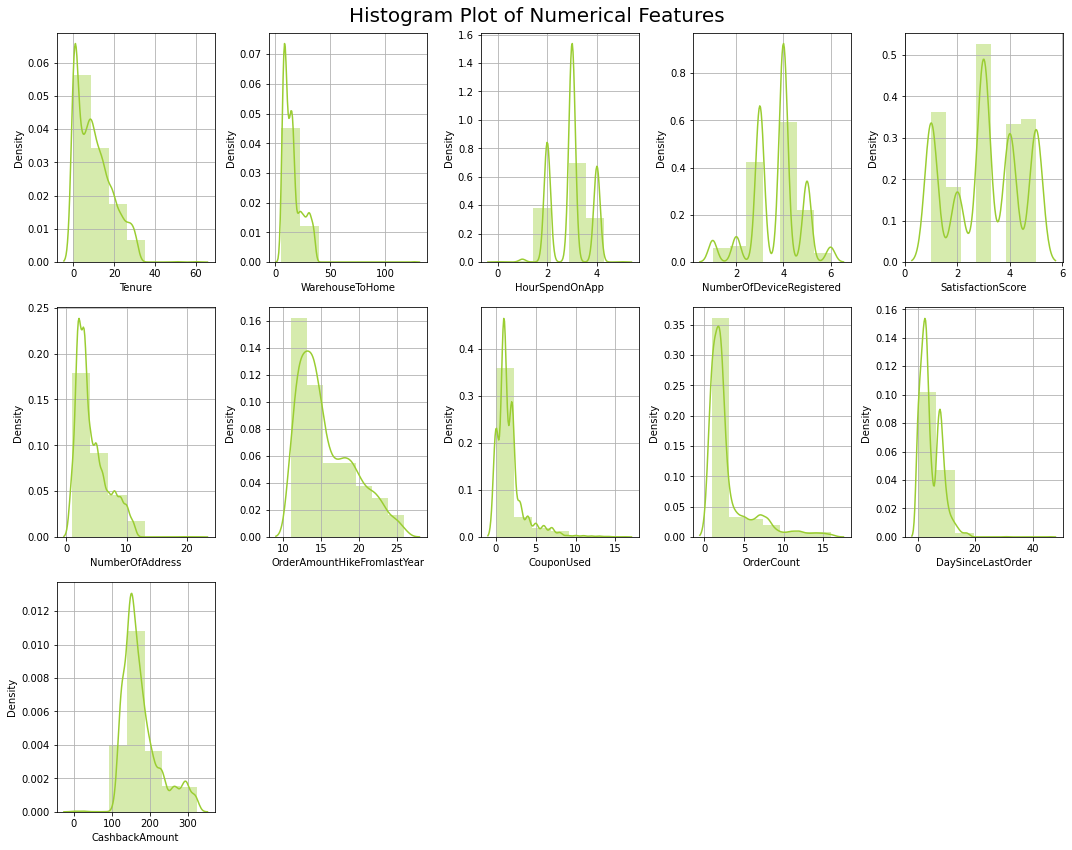

In [67]:
numFeat = dfUnc.select_dtypes(include=np.number).columns.tolist()

fig = plt.figure(figsize = (15,12))
for index, var in enumerate(numFeat[1:]):
  ax = fig.add_subplot(3,5,index+1)
  sns.distplot(dfUnc[var], ax=ax, bins=7, color='yellowgreen')
  plt.grid(True)

fig.suptitle("Histogram Plot of Numerical Features", fontsize = 20)
fig.tight_layout()
fig.show()

As we can see, there are more features that left skewed in our numerical features. Left skewed is situation when the mean of our feature smaller than the median. From here, we need to use median instead of mean to desrcibed numerical features. Maybe, there is some question "What is the function of knowing that?". Knowing this, if we want to impute missing value, we can't use mean value of feature, instead we can use the median value of feature.  